In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps



from Config import gkey

In [38]:
Coronavirus_data = pd.read_csv("us_healthcare_capacity-county-CovidCareMap.csv")
Coronavirus_data.head()   

,fips_code,State,County Name,Staffed All Beds,Staffed ICU Beds,Licensed All Beds,All Bed Occupancy Rate,ICU Bed Occupancy Rate,Population,Population (20+),...,Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)],Staffed ICU Beds [Per 1000 People],Staffed ICU Beds [Per 1000 Adults (20+)],Staffed ICU Beds [Per 1000 Elderly (65+)],Licensed All Beds [Per 1000 People],Licensed All Beds [Per 1000 Adults (20+)],Licensed All Beds [Per 1000 Elderly (65+)],ICU Bed Source,ICU Bed Source Last Updated
0,2016,AK,Aleutians West,0.0,0.0,0.0,NaN,NaN,5723.0,4983.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Facility aggregation,NaN
1,2020,AK,Anchorage,979.0,73.0,1149.0,0.66,0.71,291538.0,213508.0,...,4.585,30.279,0.250,0.342,2.258,3.941,5.382,35.536,Facility aggregation,NaN
2,2050,AK,Bethel,34.0,0.0,37.0,0.40,NaN,18216.0,11082.0,...,3.068,24.251,0.000,0.000,0.000,2.031,3.339,26.391,Facility aggregation,NaN
3,2070,AK,Dillingham,18.0,0.0,18.0,0.15,NaN,5000.0,3278.0,...,5.491,38.298,0.000,0.000,0.000,3.600,5.491,38.298,Facility aggregation,NaN
4,2090,AK,Fairbanks North Star,145.0,13.0,175.0,0.46,0.66,98971.0,72505.0,...,2.000,14.210,0.131,0.179,1.274,1.768,2.414,17.150,Facility aggregation,NaN


In [39]:
# number of countys
Counties = Coronavirus_data['fips_code'].count()
Counties

2537

In [40]:
#hospital beds per county in each state
hospital_beds = Coronavirus_data.groupby(['State', 'County Name']).sum()['Staffed All Beds']
hospital_beds

State  County Name         
AK     Aleutians West            0.0
       Anchorage               979.0
       Bethel                   34.0
       Dillingham               18.0
       Fairbanks North Star    145.0
                               ...  
WY     Sweetwater               74.0
       Teton                    48.0
       Uinta                   105.0
       Washakie                 18.0
       Weston                   12.0
Name: Staffed All Beds, Length: 2533, dtype: float64

In [41]:
#occupancy rate in hospitals per county in each state
occupancy_rate = Coronavirus_data.groupby(['State', 'County Name']).sum()['All Bed Occupancy Rate']
occupancy_rate

State  County Name         
AK     Aleutians West          0.00
       Anchorage               0.66
       Bethel                  0.40
       Dillingham              0.15
       Fairbanks North Star    0.46
                               ... 
WY     Sweetwater              0.25
       Teton                   0.36
       Uinta                   0.58
       Washakie                0.29
       Weston                  0.60
Name: All Bed Occupancy Rate, Length: 2533, dtype: float64

In [48]:
#Configure gmaps.
gmaps.configure(api_key = gkey)
#Use the Lat and Lng as locations and Humidity as the weight.
locations = Coronavirus_data[["Lat", "Lng"]]
#Add Heatmap layer to map.
Occupancy_rate = Coronavirus_data["Occupancy rate"]

KeyError: "None of [Index(['Lat', 'Lng'], dtype='object')] are in the [columns]"

In [12]:
grouped_df = Coronavirus_data.groupby(['State'])['Staffed All Beds [Per 1000 Adults (20+)]', 'Staffed All Beds [Per 1000 Elderly (65+)]'].apply(lambda x : x.astype(float).sum()).reset_index()
grouped_df

C:\Users\whitn\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State,Staffed All Beds [Per 1000 Adults (20+)],Staffed All Beds [Per 1000 Elderly (65+)]
0,AK,47.207,291.319
1,AL,198.056,824.022
2,AR,179.915,740.718
3,AZ,32.914,128.517
4,CA,130.694,608.443
5,CO,151.553,621.109
6,CT,17.463,77.393
7,DC,5.761,37.396
8,DE,11.100,49.323
9,FL,198.847,828.836


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

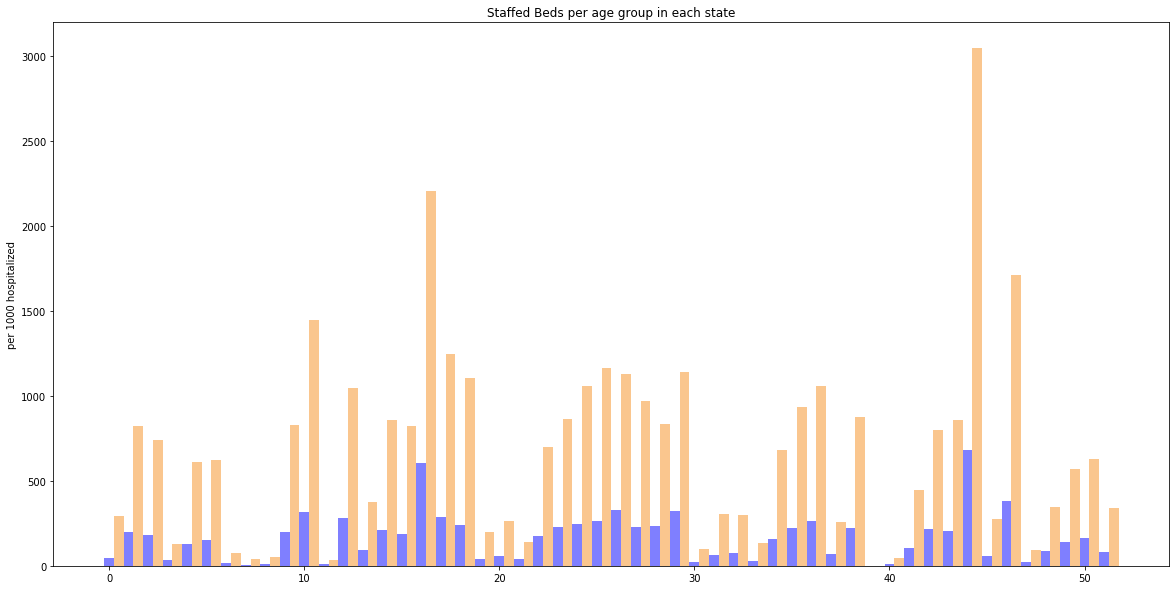

In [32]:
# Setting the positions and width for the bars
pos = list(range(len(grouped_df['Staffed All Beds [Per 1000 Adults (20+)]']))) 
width = .50 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,10))


# in position pos,
plt.bar(pos, 
grouped_df['Staffed All Beds [Per 1000 Adults (20+)]'], 
        # of width
width,
#height, 
        # with alpha 0.5
alpha=0.5, 
        # with color
color='blue', 
label=grouped_df['State'][0]) 


# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
grouped_df['Staffed All Beds [Per 1000 Elderly (65+)]'],
        # of width
width,
#height,
        # with alpha 0.5
alpha=0.5, 
        # with color
color='#F78F1E',
label=grouped_df['State'][1]) 

# Set the y axis label
ax.set_ylabel('per 1000 hospitalized')

# Set the chart's title
ax.set_title('Staffed Beds per age group in each state')

ax.set_xlabel(grouped_df['State'])
ax.set_xticklabels(x_labels)

# Set the position of the x ticks
#ax.set_xticks([x_labels])

# Set the labels for the x ticks
#ax.set_xticklabels(grouped_df['State'])

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(grouped_df['Staffed All Beds [Per 1000 Adults (20+)]'] + grouped_df['Staffed All Beds [Per 1000 Elderly (65+)]'] )

# Adding the legend and showing the plot
plt.legend(['Staffed All Beds [Per 1000 Adults (20+)]', 'Staffed All Beds [Per 1000 Elderly (65+)]'], loc='upper left')
#plt.grid()
#plt.show()




In [49]:
#scatter
bed_df = grouped_df.groupby(['State','Staffed All Beds [Per 1000 Adults (20+)]'], 'Staffed All Beds [Per 1000 Elderly (65+)]')['State'].mean()
plt.scatter(bed_df['Staffed All Beds [Per 1000 Adults (20+)]'], bed_df['Staffed All Beds [Per 1000 Elderly (65+)]'])
plt.xlabel('beds staffed')
plt.ylabel('per 1000 hospitalized')
plt.title('Adults vs Elderly')
plt.show()




ValueError: No axis named Staffed All Beds [Per 1000 Elderly (65+)] for object type <class 'pandas.core.frame.DataFrame'>